# Analysis of Denmark's supply balance (2005 - 2023)

> **Structure:** 
> 1. Reading and cleaning data from Statistikbanken.dk
> 1. Analysis of variables in the supply balance
> 1. Conclusion

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import pandas_datareader
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

Relevant data is imported through an API from Statistikbanken.dk

In [2]:
# Importing relevant statistics from Statistikbanken.dk
ind = DstApi('NAN1')

# Displaying messy data
tabsum = ind.tablesummary(language='en')

for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-03-27T08:00:00
TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2010-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


## Cleaning up the data set

To make a meaningful analysis from 2005 - 2023 of the supply balance, I need:
GDP, Imports of goods and services, Exports of goods and services, Private consumption, Government consumption expenditure, and Gross capital formation in 2010-prices, chained values (bill. DKK).

In [3]:
params = ind._define_base_params(language='en')

variables = params['variables']
variables[0]['values'] = ['B1GQK', 'P7K', 'P6D', 'P31S1MD', 'P3S13D', 'P5GD'] # GDP, Import, Export, Private consumption, Government consumption, Gross investments
variables[1]['values'] = ['LAN_M'] # 2010-prices, chained values
variables[2]['values'] = ['>=2005<=2023'] # Time interval
params

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT',
   'values': ['B1GQK', 'P7K', 'P6D', 'P31S1MD', 'P3S13D', 'P5GD']},
  {'code': 'PRISENHED', 'values': ['LAN_M']},
  {'code': 'Tid', 'values': ['>=2005<=2023']}]}

Next, I will print out the header for the sorted data to make sure everything looks fine

In [4]:
ind_sorted = ind.get_data(params=params)
ind_sorted.head(20)

,TRANSAKT,PRISENHED,TID,INDHOLD
0,B.1*g Gross domestic product,"2010-prices, chained values, (bill. DKK.)",2022,2272.3
1,P.3 Government consumption expenditure,"2010-prices, chained values, (bill. DKK.)",2022,523.2
2,P.31 Private consumption,"2010-prices, chained values, (bill. DKK.)",2022,1015.7
3,P.5g Gross capital formation,"2010-prices, chained values, (bill. DKK.)",2022,567.6
4,P.6 Exports of goods and services,"2010-prices, chained values, (bill. DKK.)",2022,1422.4
5,P.7 Imports of goods and services,"2010-prices, chained values, (bill. DKK.)",2022,1264.5
6,B.1*g Gross domestic product,"2010-prices, chained values, (bill. DKK.)",2005,1792.0
7,P.3 Government consumption expenditure,"2010-prices, chained values, (bill. DKK.)",2005,441.8
8,P.31 Private consumption,"2010-prices, chained values, (bill. DKK.)",2005,841.5
9,P.5g Gross capital formation,"2010-prices, chained values, (bill. DKK.)",2005,379.3


**Cleaning- and displaying dataframe**

Finally, I will construct a table of my sorted data and shorten the names of its variables\
B.1*g Gross domestic product = GDP\
P.3 Government consumption expenditure = G\
P.31 Private consumption = C\
P.5g Gross capital formation = I\
P.6 Exports of goods and services = X\
P.7 Imports of goods and services = M\
\
Also, the values of each variable is converted into a float, such that I can use the values in calculations and graphs

In [5]:
# Filtering ind_sorted into relevant variables and storing in filtered_data
variables_of_interest = ['B.1*g Gross domestic product',
                         'P.3 Government consumption expenditure', 
                         'P.31 Private consumption',
                         'P.5g Gross capital formation', 
                         'P.6 Exports of goods and services',
                         'P.7 Imports of goods and services']
filtered_data = ind_sorted[ind_sorted['TRANSAKT'].isin(variables_of_interest)]

# Convert 'INDHOLD' column to float
filtered_data['INDHOLD'] = filtered_data['INDHOLD'].astype(float)

# Renaming variables in filtered_data
variable_mapping = {
    'B.1*g Gross domestic product': 'GDP',
    'P.3 Government consumption expenditure': 'G',
    'P.31 Private consumption': 'C',
    'P.5g Gross capital formation': 'I',
    'P.6 Exports of goods and services': 'X',
    'P.7 Imports of goods and services': 'M'
}
filtered_data['TRANSAKT'] = filtered_data['TRANSAKT'].map(variable_mapping)

# Pivot the DataFrame to have 'TID' as index and 'TRANSAKT' as columns and saving DataFrame as finished_data
finished_data = filtered_data.pivot(index='TID', columns='TRANSAKT', values='INDHOLD')

In [6]:
print(finished_data)

TRANSAKT       C      G     GDP      I       M       X
TID                                                   
2005       841.5  441.8  1792.0  379.3   705.3   824.2
2006       866.3  453.1  1862.1  427.7   803.9   909.4
2007       881.6  458.5  1879.0  439.1   850.8   942.6
2008       885.9  473.4  1869.4  418.0   891.4   979.1
2009       855.5  487.8  1777.7  329.3   784.9   888.8
2010       862.2  495.6  1810.9  327.3   789.1   914.9
2011       864.6  492.5  1835.1  345.2   847.9   980.8
2012       869.0  496.2  1839.3  353.1   870.9   992.2
2013       871.5  495.7  1856.5  365.1   883.7  1008.1
2014       879.4  505.3  1886.5  380.8   918.1  1039.7
2015       899.5  513.8  1930.7  400.7   960.0  1076.9
2016       921.2  514.6  1993.4  431.2   995.1  1121.2
2017       942.3  519.1  2049.6  449.4  1036.8  1175.1
2018       975.2  519.2  2090.4  468.9  1089.6  1214.5
2019       990.6  523.6  2121.6  458.8  1122.4  1269.3
2020       977.0  514.5  2070.2  475.2  1091.1  1191.8
2021      

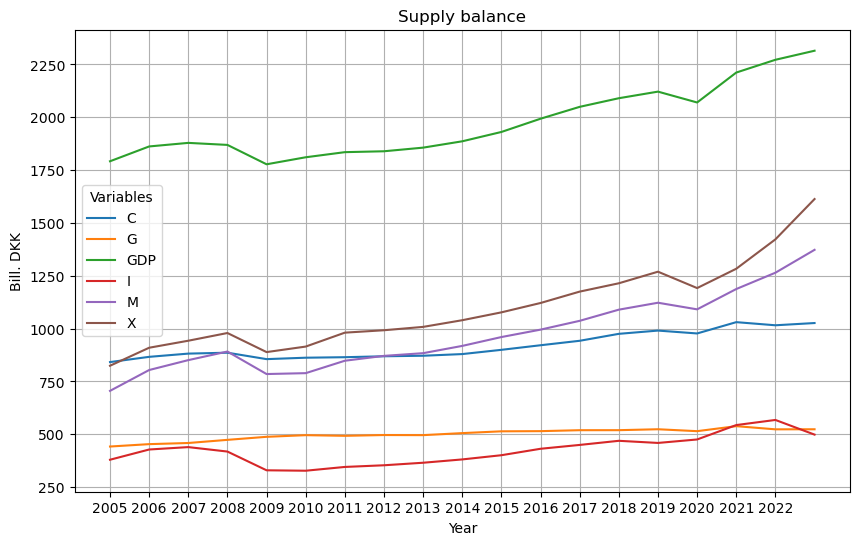

In [7]:
# Plot the time series
finished_data.plot(figsize=(10, 6))
plt.title('Supply balance')
plt.xlabel('Year')
plt.ylabel('Bill. DKK')
plt.grid(True)
plt.legend(title='Variables')
plt.xticks(range(2005, 2023))
plt.show()

In the figure above, all of my relevant variables are plotted for a graphic overview of their development from 2005 to 2023

# Analysis

**Graphs displaying yealy growth in components of the supply balance**

The next piece of code takes the DataFrame *finished_data* and finds the percentage growth year for year and  its mean for every column.\
Next, it displays graphs for the yearly growth and adds the mean yearly growth as text for each column.

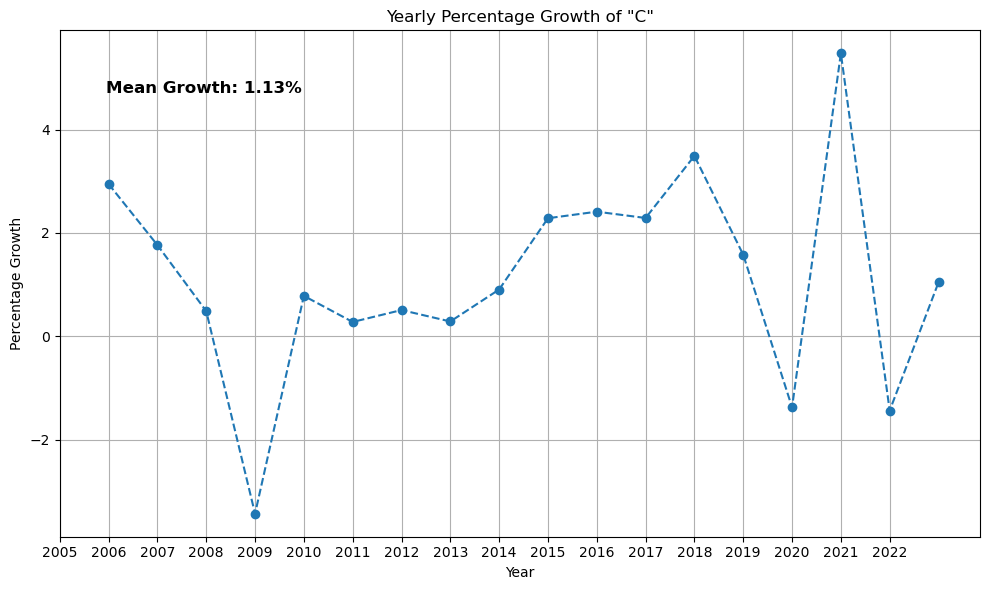

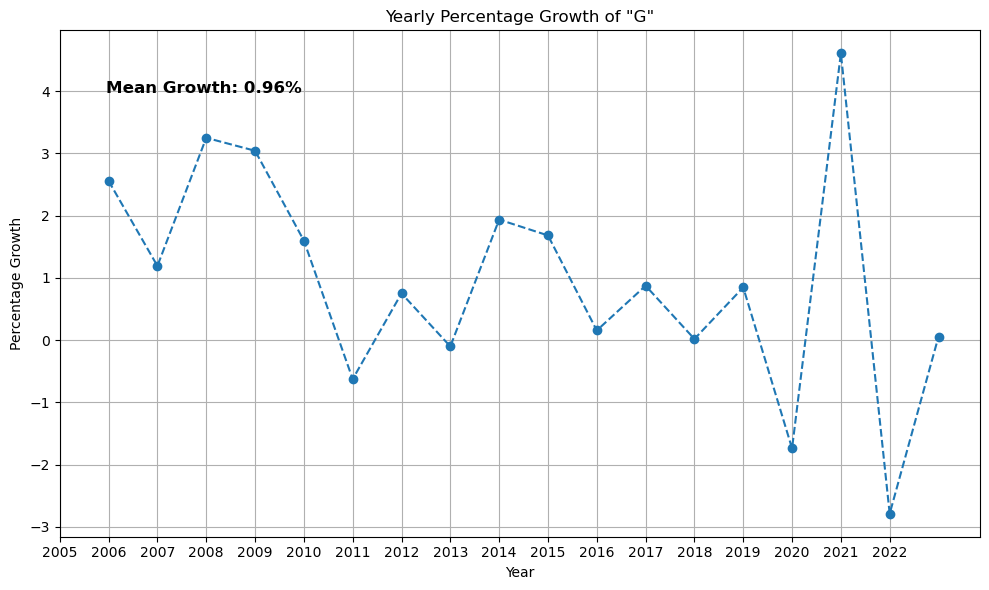

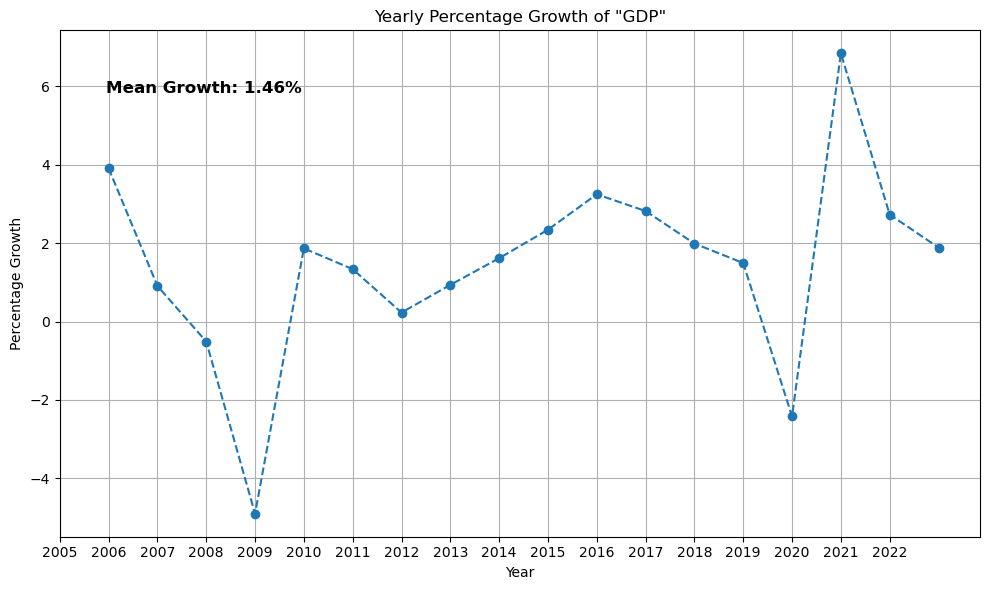

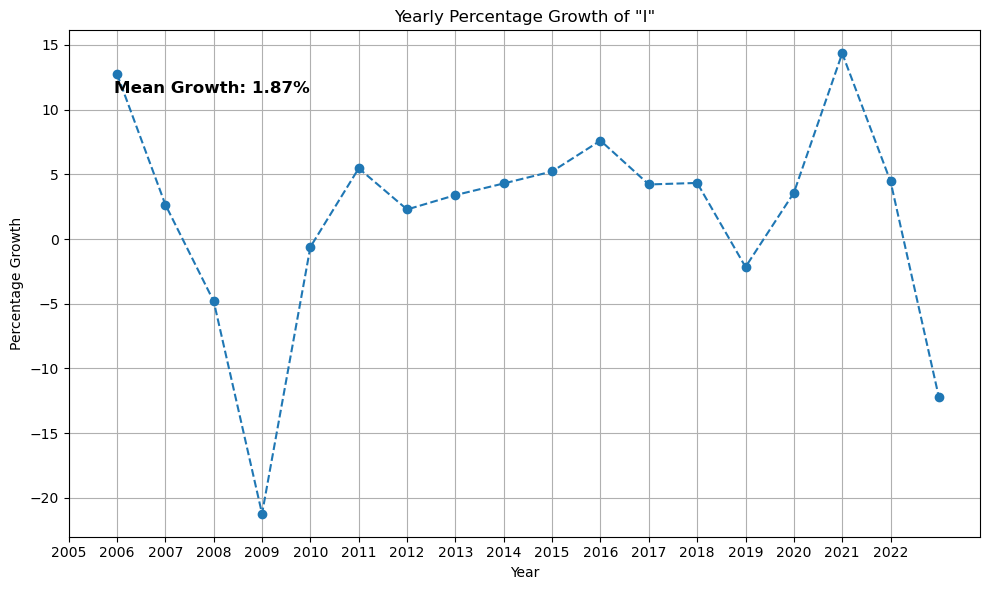

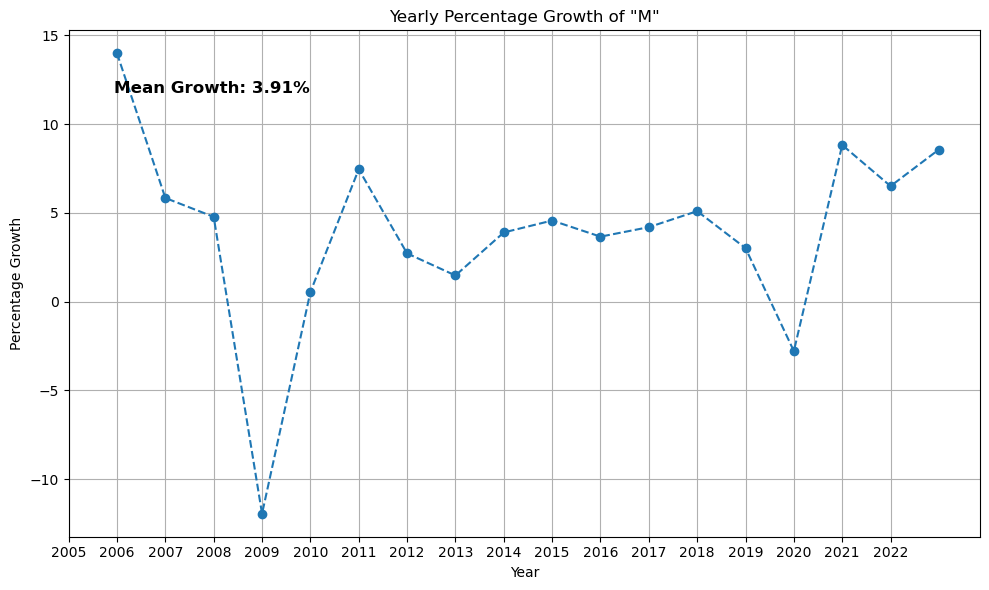

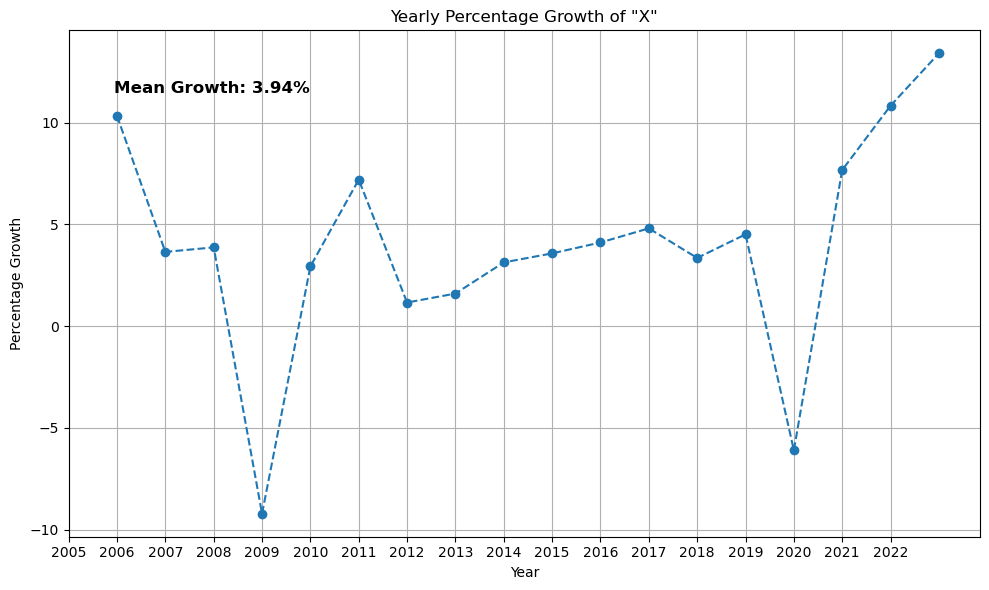

In [8]:
for var in finished_data:
    var_growth = finished_data[var].pct_change() * 100
    mean_growth = var_growth.mean()
    
    plt.figure(figsize=(10, 6))
    plt.plot(var_growth.index, var_growth.values, marker='o', linestyle='--')
    plt.title(f'Yearly Percentage Growth of "{var}"')
    plt.text(0.05, 0.9, f'Mean Growth: {mean_growth:.2f}%', transform=plt.gca().transAxes, verticalalignment='top',
             fontsize=12, weight ='bold')
    plt.xlabel('Year')
    plt.ylabel('Percentage Growth')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(range(2005, 2023))
    plt.show()


From this information, it is more clearly visualized how each variable fluctatues from year to year.\
In the following, I will indentify business cycles by evaluating the yearly growth in GDP.

**Identifying business cycles**\
In the following code, I will identify a year as a *boom* if having a GDP growth > 1.5%, and a *recession* if having a GDP growth $ \le 1.5%$\
The business cycles are then appended to the DataFrame *finished_data*

In [9]:
gdp_growth = finished_data['GDP'].pct_change() * 100
threshold = 1.5
business_cycles = []

for growth in gdp_growth:
    if growth > threshold:
        business_cycles.append('Boom')
    else:
        business_cycles.append('Recession')

finished_data['Business cycle'] = business_cycles

print(finished_data)

TRANSAKT       C      G     GDP      I       M       X Business cycle
TID                                                                  
2005       841.5  441.8  1792.0  379.3   705.3   824.2      Recession
2006       866.3  453.1  1862.1  427.7   803.9   909.4           Boom
2007       881.6  458.5  1879.0  439.1   850.8   942.6      Recession
2008       885.9  473.4  1869.4  418.0   891.4   979.1      Recession
2009       855.5  487.8  1777.7  329.3   784.9   888.8      Recession
2010       862.2  495.6  1810.9  327.3   789.1   914.9           Boom
2011       864.6  492.5  1835.1  345.2   847.9   980.8      Recession
2012       869.0  496.2  1839.3  353.1   870.9   992.2      Recession
2013       871.5  495.7  1856.5  365.1   883.7  1008.1      Recession
2014       879.4  505.3  1886.5  380.8   918.1  1039.7           Boom
2015       899.5  513.8  1930.7  400.7   960.0  1076.9           Boom
2016       921.2  514.6  1993.4  431.2   995.1  1121.2           Boom
2017       942.3  51

From this output, I divide the economy into the folowing business cycles:\
2007-2013: Recession\
2014-2018: Boom\
2019-2020: Recession\
2021-2023: Boom\
\
Next, I will use the .loc[] method to extract the business cycles from *finished_data* and collect them in a list.\
I will also construct a list of labels for each business cycle.\
\
First, I will zip together *business_cycles_list* and *cycle_label*,\
inside this zipped list, I will loop over all variables in the business cycles, and print out its corresponding mean growth in each business cycle

In [10]:
# Fecthing all columns but 'Business cycle' for relevant time periods
# One period earlier than the start of each business cycle is fetched to create yearly growth rates from starting year
rec_one = finished_data.loc['2006':'2013', :'X']
boom_one = finished_data.loc['2013':'2018', :'X']
rec_two = finished_data.loc['2018':'2020', :'X']
boom_two = finished_data.loc['2020':'2023', :'X']

# ANSI code for making the output in bold and resetting to normal
BOLD = '\033[1m'
RESET = '\033[0m'

business_cycles_list = [rec_one, boom_one, rec_two, boom_two]
cycle_label = ['Recession 2007-2013', 'Boom 2014-2018', 'Recession 2019-2020', 'Boom 2021-2023']

for cycle, label in zip(business_cycles_list, cycle_label):
    print(BOLD + label + ':' + RESET)
    for var in cycle:
            var_growth = cycle[var].pct_change() * 100
            mean_growth = var_growth.mean()
            print(f'Mean growth rate, {var}: {mean_growth:.2f}%')
    print('\n')





Recession 2007-2013:
Mean growth rate, C: 0.10%
Mean growth rate, G: 1.30%
Mean growth rate, GDP: -0.02%
Mean growth rate, I: -1.83%
Mean growth rate, M: 1.55%
Mean growth rate, X: 1.60%


Boom 2014-2018:
Mean growth rate, C: 2.28%
Mean growth rate, G: 0.93%
Mean growth rate, GDP: 2.40%
Mean growth rate, I: 5.14%
Mean growth rate, M: 4.28%
Mean growth rate, X: 3.80%


Recession 2019-2020:
Mean growth rate, C: 0.10%
Mean growth rate, G: -0.45%
Mean growth rate, GDP: -0.47%
Mean growth rate, I: 0.71%
Mean growth rate, M: 0.11%
Mean growth rate, X: -0.80%


Boom 2021-2023:
Mean growth rate, C: 1.69%
Mean growth rate, G: 0.63%
Mean growth rate, GDP: 3.82%
Mean growth rate, I: 2.19%
Mean growth rate, M: 7.96%
Mean growth rate, X: 10.64%




In the above, the mean growth rate of each variable in the supply balance is stated, divided into business cycles.\
Not surprisingly, in periods of recession, the economic growth measured across all variables are lower than during booms.

# Conclusion

Since 2005, Denmark has encountered two periods of recession.\
The first caused by the financial crisis of 2009, and the second covid-19 in 2019-2020